#### OBJETIVO: Caracteristicas de los sitios de estudio (SP, ST, BA, MD, MX)



In [1]:
#Librerias
import rasterio
import rioxarray as rxr
import matplotlib.pyplot as plt
from rasterio.plot import show
import pandas as pd
import numpy as np
import os

In [2]:
estacion = "SP"
numRaster = "01"
ruta = (
    f"D:/Josefina/Proyectos/ProyectoChile/"
    f"{estacion}/dataset/rasterTemplate/"
    f"{numRaster}_raster_template.tif"
)

grilla = rasterio.open(ruta)


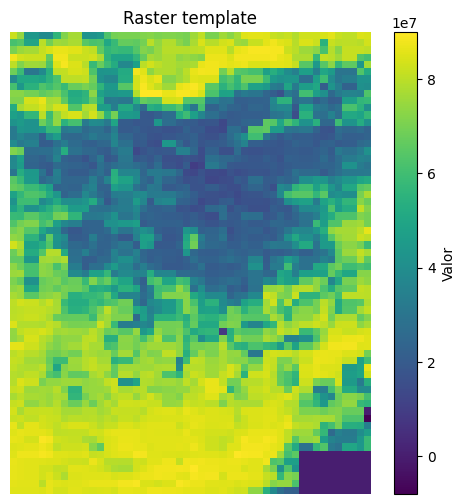

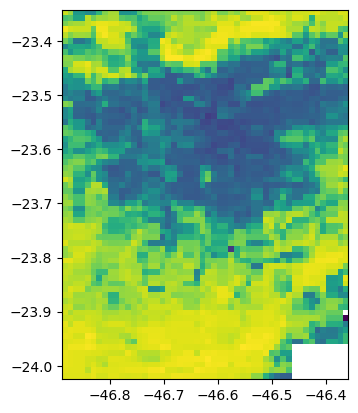

<Axes: >

In [3]:
# Plot con matplotlib (sin coordenadas)
band = grilla.read(1)  # primera banda

plt.figure(figsize=(6, 6))
plt.imshow(band)
plt.colorbar(label="Valor")
plt.title("Raster template")
plt.axis("off")
plt.show()


#################
# Plot con rasterio (con coordenadas)
show(grilla, cmap="viridis")

In [8]:
## Numero de estaciones consideradas
    # Leer archivo
estacion = "SP"
ruta_test = (
    f"D:/Josefina/Proyectos/ProyectoChile/"
    f"{estacion}/modelos/ParticionDataSet/Modelo_1/"
    f"M1_test_{estacion}.csv"
)

ruta_train = (
    f"D:/Josefina/Proyectos/ProyectoChile/"
    f"{estacion}/modelos/ParticionDataSet/Modelo_1/"
    f"M1_train_{estacion}.csv"
)

estaciones_test  = pd.read_csv(ruta_test)
estaciones_train = pd.read_csv(ruta_train)
print("Estaciones de testeo",pd.unique(estaciones_test["estacion"]))
print("Estaciones de Entrenamiento",pd.unique(estaciones_train["estacion"]))


print("Numero Estaciones de testeo",len(pd.unique(estaciones_test["estacion"])))
print("Numero Estaciones de Entrenamiento",len(pd.unique(estaciones_train["estacion"])))


Estaciones de testeo ['Marg.Tiete-Pte Remedios' 'Maua' 'Pico do Jaragua' 'Pinheiros' 'Santana'
 'Tabao da Serra' 'Parque D.Pedro II' 'Guarulhos-Palco Municipal' 'Osasco'
 'Ciudad Universitaria - USP' 'Guarulhos - Pimentas' 'Ibirapuera'
 'Interlagos' 'Itaim Paulista']
Estaciones de Entrenamiento ['Carapicuiba' 'Marg.Tiete-Pte Remedios' 'Maua' 'Pico do Jaragua'
 'Pinheiros' 'Santana' 'Santo Amaro' 'Tabao da Serra' 'Parque D.Pedro II'
 'Guarulhos-Palco Municipal' 'Osasco' 'Ciudad Universitaria - USP'
 'Guarulhos - Pimentas' 'Ibirapuera' 'Interlagos' 'Itaim Paulista']
Numero Estaciones de testeo 14
Numero Estaciones de Entrenamiento 16


In [9]:
## Fechas comienzo y final de cada estacion

estacion = "SP"
ruta_merge = (
    f"D:/Josefina/Proyectos/ProyectoChile/"
    f"{estacion}/proceed/merge_tot/"
    f"{estacion}_merge_comp.csv"
)
# Leer archivo con datos
dataset_merge_comp  = pd.read_csv(ruta_merge)
#Convertir columna a fecha
dataset_merge_comp['date'] = pd.to_datetime(dataset_merge_comp["date"])
print(dataset_merge_comp['date'])


0       2023-12-20
1       2023-12-24
2       2023-12-25
3       2023-12-27
4       2023-12-28
           ...    
12661   2023-12-21
12662   2023-12-23
12663   2023-12-25
12664   2023-12-27
12665   2023-12-28
Name: date, Length: 12666, dtype: datetime64[ns]


In [10]:
# # Dataframe con el nombre de la estacion con fecha inicio-fin del periodo
fechas_por_estacion = (
    dataset_merge_comp
        .groupby("estacion", as_index=False)
        .agg(
            fecha_inicial=("date", "min"),
            fecha_final=("date", "max")
        )
)

print(fechas_por_estacion)


                      estacion fecha_inicial fecha_final
0                  Carapicuiba    2023-12-20  2023-12-28
1   Ciudad Universitaria - USP    2015-01-05  2023-12-28
2         Guarulhos - Pimentas    2015-06-18  2023-12-28
3    Guarulhos-Palco Municipal    2017-02-17  2023-12-28
4                   Ibirapuera    2015-01-03  2023-12-28
5                   Interlagos    2023-12-20  2023-12-28
6               Itaim Paulista    2015-06-28  2023-12-28
7      Marg.Tiete-Pte Remedios    2015-01-05  2023-12-28
8                         Maua    2019-02-23  2023-12-28
9                       Osasco    2017-07-11  2023-12-28
10           Parque D.Pedro II    2016-07-05  2023-12-28
11             Pico do Jaragua    2016-07-20  2023-12-28
12                   Pinheiros    2015-01-01  2023-12-28
13                     Santana    2017-06-02  2023-12-20
14                 Santo Amaro    2023-12-20  2023-12-28
15              Tabao da Serra    2023-12-20  2023-12-28
